In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
# Exploratory Data Analysis (EDA)
print(data.head())  # Check the first few rows of the dataset
print('-------------------------------------')
print(data.info())  # Get information about the dataset

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


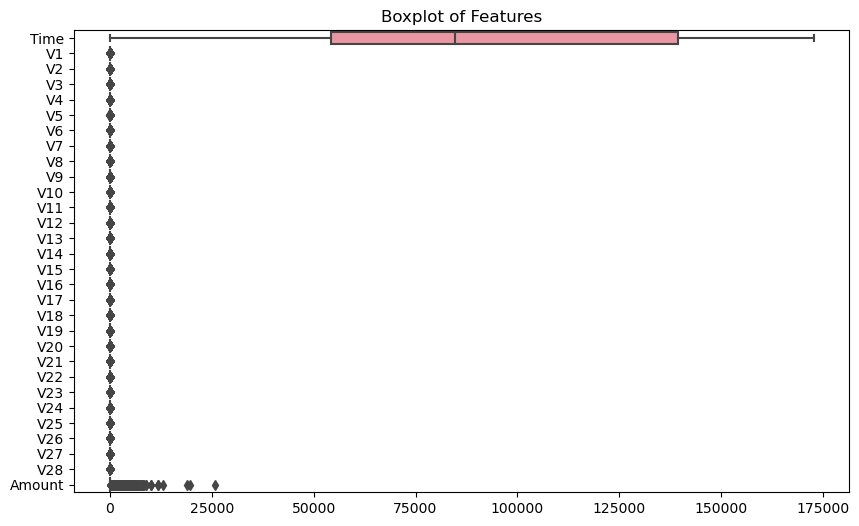

<Figure size 640x480 with 0 Axes>

In [5]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['Class']), orient='h')
plt.title("Boxplot of Features")
plt.show()

# Save the plot to a file
plt.savefig('boxplot_of_features.png')


In [7]:
# Get the correct datatype for date
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # Convert Time to datetime
#print(data['Time'])
# Extract hour, minute, and second from the Time column
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second


In [8]:
# Drop the original Time column
data.drop(columns=['Time'], inplace=True)

In [9]:
# Balancing the data
fraud_count = data['Class'].value_counts()[1]
non_fraud_indices = data[data['Class'] == 0].index
random_indices = np.random.choice(non_fraud_indices, fraud_count, replace=False)
fraud_indices = data[data['Class'] == 1].index
under_sample_indices = np.concatenate([fraud_indices, random_indices])
under_sample = data.loc[under_sample_indices]

In [10]:
# Feature Engineering and feature selection
X = under_sample.drop(columns=['Class'])
y = under_sample['Class']

In [11]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Apply SMOTE for balancing
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [13]:
# Model Selection, Training, Predicting, and Assessment
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)

Accuracy: 0.949238578680203
Confusion Matrix:
 [[97  1]
 [ 9 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.99      0.91      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



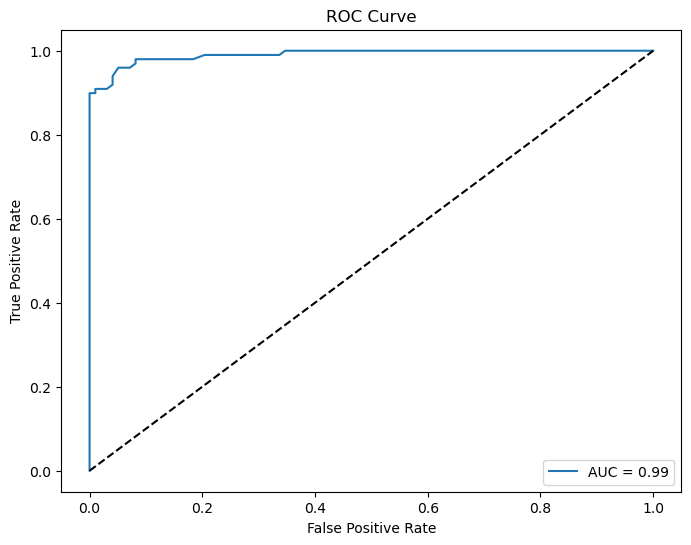

<Figure size 640x480 with 0 Axes>

In [24]:
# Choose the metrics for the model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Compute ROC curve and AUC
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the plot to a file
plt.savefig('roc_curve.png')

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

from sklearn.linear_model import LogisticRegression

# Evaluate Logistic Regression model
y_pred_lr = log_reg.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9441624365482234
Confusion Matrix:
 [[96  2]
 [ 9 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        98
           1       0.98      0.91      0.94        99

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [25]:
# Hyperparameter Tuning/Model Improvement
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [26]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_res, y_res)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
